In [2]:
import sys
import os

sys.path.append(os.getcwd())

import numpy as np
import refnx
from refnx.dataset import ReflectDataset
from refnx.analysis import Transform, CurveFitter, Objective, GlobalObjective, Parameter, possibly_create_parameter
from refnx.reflect import SLD, ReflectModel, MixedReflectModel, Slab, Structure, MixedSlab
from refnx.analysis.parameter import _BinaryOp
import scipy
import periodictable
import matplotlib.pyplot as plt
import dynesty
import pickle

from VFP_v0_0_1 import VFP

In [3]:
rng = np.random.default_rng(seed=42)

In [4]:
# SLDs
Si = SLD(2.07, name='Si')
SiO2 = SLD(3.47, name='SiO2')
Surfactant = SLD(0.1, name='Surf')
D2O = SLD(6.37, name='D2O')

In [5]:
# layers

SiO2_lay = SiO2(24, 3)

Surf_lay = Surfactant(31, 5)
Surf_lay.vfsolv.setp(0.4)

D2O_lay = D2O(0, 7)

In [6]:
# structure
d2o_struct_NC = Si | SiO2_lay | Surf_lay | D2O_lay

In [7]:
NC_model = ReflectModel(d2o_struct_NC, scale=1, bkg=6e-6, dq=3*2.355)

In [8]:
# create some noise that is normally distributed & has a standard deviation = 5 % of each reflectivity data point.
# i.e Noise ~ N(0, 0.05*R(Qi))

Q = np.geomspace(9E-3, 3E-1, 100)
noise = np.random.normal(0, 0.05*NC_model.model(x=Q), 100)

In [9]:
#add the noise to the simulated reflectivity.
R_rand = NC_model.model(x=Q)+noise

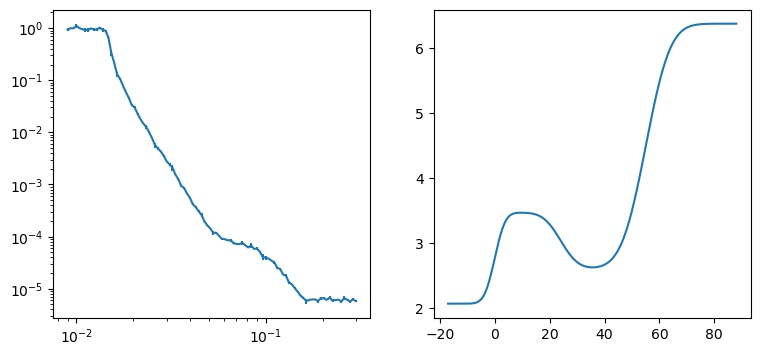

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
ax[0].errorbar(Q, R_rand, np.abs(noise))
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].plot(*NC_model.structure.sld_profile())

In [22]:
data = np.vstack([Q, R_rand, np.abs(noise)])

In [25]:
np.savetxt('Fake_Si_data.dat', data.T)

In [37]:
np.savetxt('Fake_Si_orig_SLD.dat', 
           np.vstack([NC_model.structure.sld_profile()[0], 
                      NC_model.structure.sld_profile()[1]]).T)